Ausgewähltes Thing[6]: box_gmr_twl-box_0924002 (ID: 9)
Gefundene Datastreams: ['latitude* measured by sensor *box_gmr_twl-box_0924002*', 'longitude* measured by sensor *box_gmr_twl-box_0924002*', 'battery_voltage* measured by sensor *box_gmr_twl-box_0924002*', 'temperature_water* measured by sensor *tmp_gmr_ds18b20_28524ab17323b*', 'tide_measurement* measured by sensor *distance_gmr_sen0313_001*', 'standard_deviation* measured by sensor *distance_gmr_sen0313_001*', 'wave_height* measured by sensor *distance_gmr_sen0313_001*']

Lade Observations für Datastream: latitude* measured by sensor *box_gmr_twl-box_0924002*


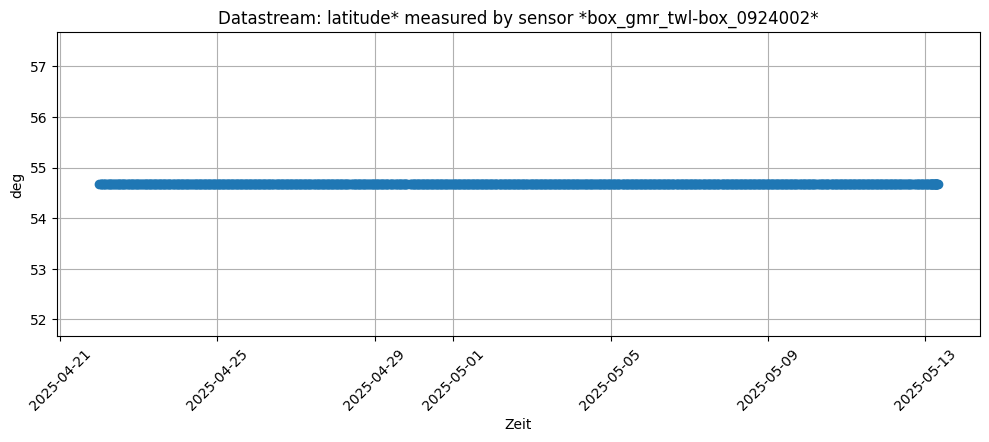


Lade Observations für Datastream: longitude* measured by sensor *box_gmr_twl-box_0924002*


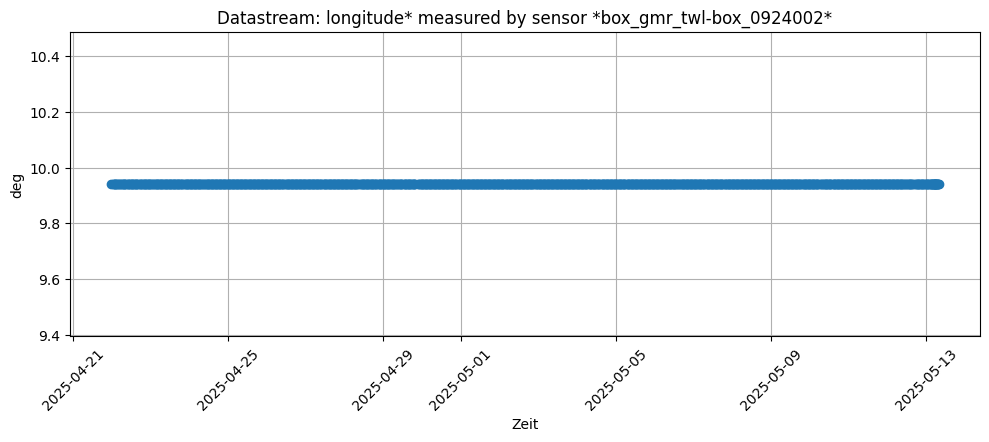


Lade Observations für Datastream: battery_voltage* measured by sensor *box_gmr_twl-box_0924002*


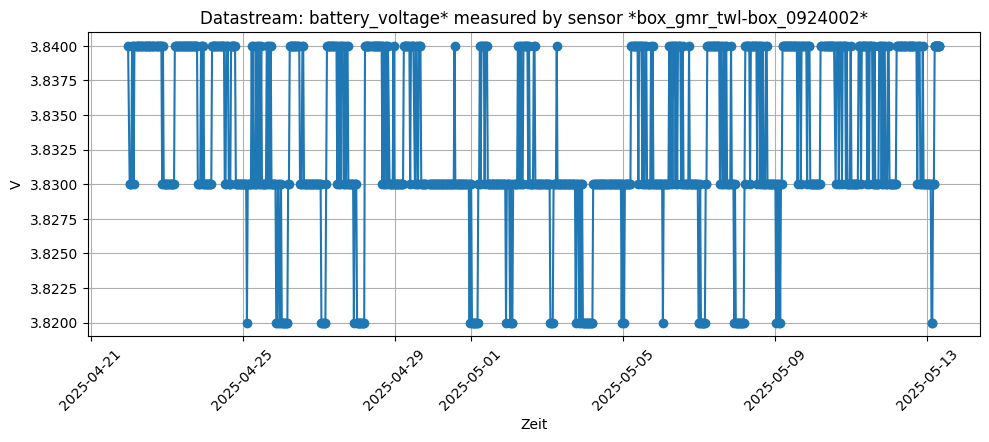


Lade Observations für Datastream: temperature_water* measured by sensor *tmp_gmr_ds18b20_28524ab17323b*


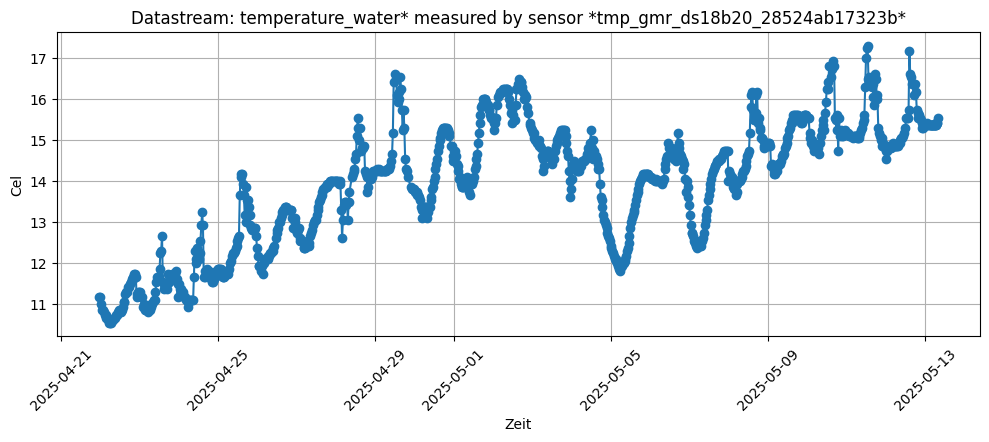


Lade Observations für Datastream: tide_measurement* measured by sensor *distance_gmr_sen0313_001*


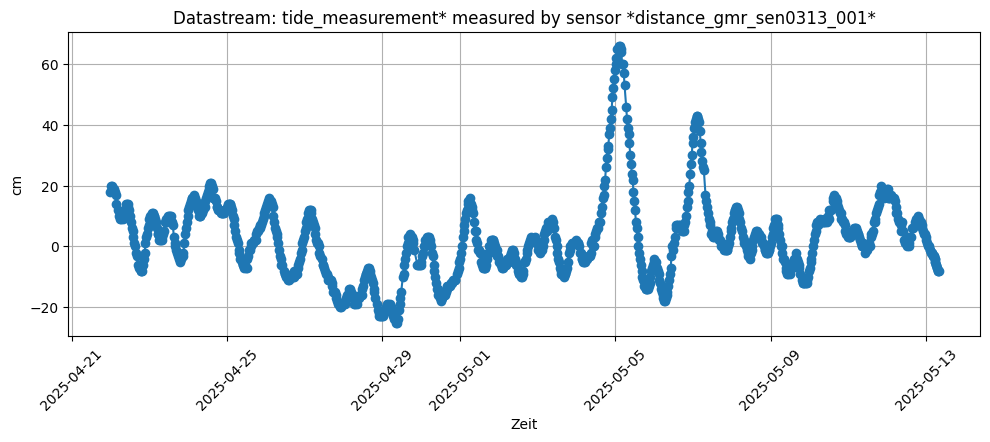


Lade Observations für Datastream: standard_deviation* measured by sensor *distance_gmr_sen0313_001*


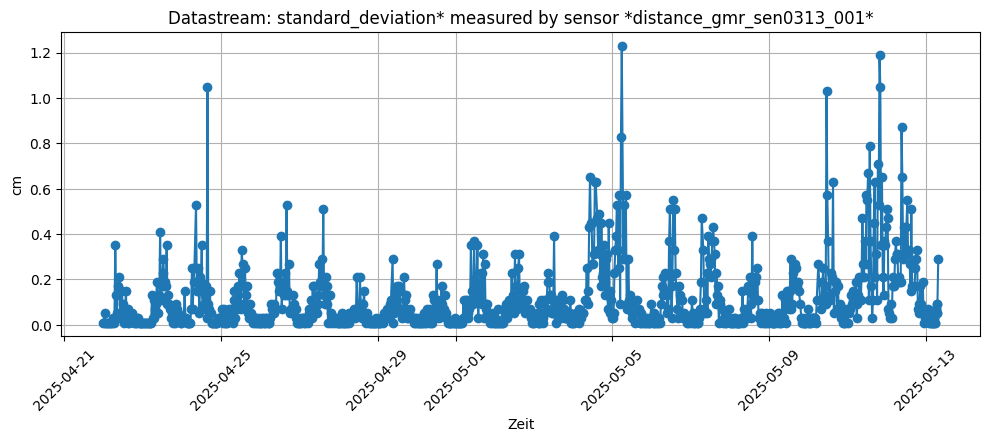


Lade Observations für Datastream: wave_height* measured by sensor *distance_gmr_sen0313_001*


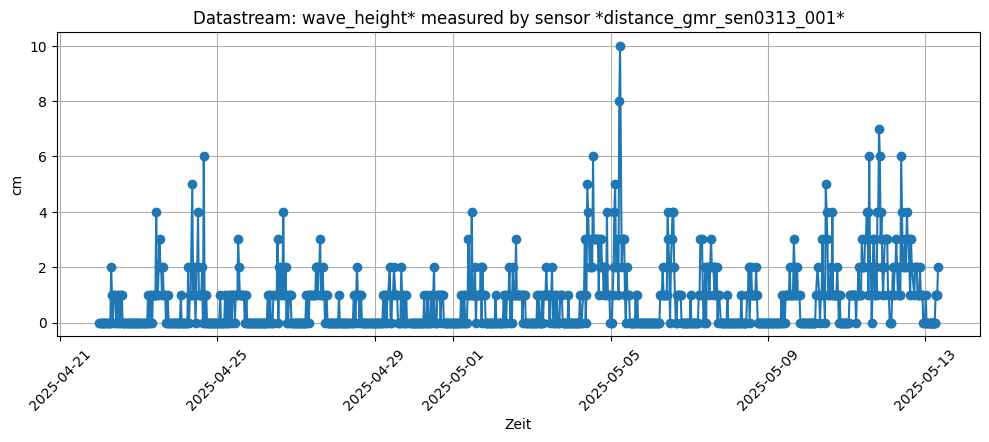

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime

# Vorher definierte Klasse importieren oder hier einfügen
from FrostServer import FrostServerClient  # Oder direkt im selben Skript definieren

def plot_thing6_datastreams(thing_number=6):
    # Initialisiere Client mit Beispiel-Server
    frost = FrostServerClient("https://timeseries.geomar.de/soop/FROST-Server/v1.1/")

    # Alle Things laden
    things = frost.list_things()

    if len(things) < 7:
        print("Thing[6] existiert nicht.")
        return

    thing = things[thing_number]
    print(f"Ausgewähltes Thing[{thing_number}]: {thing['name']} (ID: {thing['@iot.id']})")

    # Datastreams für Thing[thing_number] abrufen
    datastreams = frost.get_entities(f"Things({thing['@iot.id']})/Datastreams")
    print(f"Gefundene Datastreams: {[ds['name'] for ds in datastreams]}")

    # Für jeden Datastream: Observations abrufen und plotten
    for ds in datastreams:
        print(f"\nLade Observations für Datastream: {ds['name']}")
        observations = frost.get_observations_for_datastream(ds['@iot.id'], top=1000)

        if not observations:
            print("→ Keine Observations gefunden.")
            continue

        # Zeit & Werte extrahieren
        times = [datetime.fromisoformat(obs['phenomenonTime'].replace('Z', '+00:00')) for obs in observations]
        values = [obs['result'] for obs in observations]

        # Plot
        plt.figure(figsize=(10, 4))
        plt.plot(times, values, marker='o', linestyle='-')
        plt.title(f"Datastream: {ds['name']}")
        plt.xlabel("Zeit")
        plt.ylabel(ds.get("unitOfMeasurement", {}).get("symbol", "Wert"))
        plt.grid(True)
        plt.tight_layout()
        plt.xticks(rotation=45)
        plt.show()


if __name__ == "__main__":
#    for i in range(7):
#        print(f"Plotting Datastreams for Thing[{i}]")
#        plot_thing6_datastreams(i)
    plot_thing6_datastreams()